## Day 26 Lecture 2 Assignment

In this assignment, we will learn about linear regression model assumptions

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

We will load the dataset below that describes the antioxidant quality of lager.

The variables are as follows:
    
The dataset contains 7 variables :

- tpc - Total phenolic content
- ma - melanoidin content
- dsa - DPPH radical scavenging activity
- asa - ABTS radical cation scavenging activity
- orac - Oxygen radical absorbance activity
- rp - Reducing Power
- mca - Metal Chelaing Activity

In [7]:
lager = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/lager_antioxidant_reg.csv')

lager.head()

,beer,tpc,ma,dsa,asa,orac,rp,mca
0,1,148.23,13.37,0.66,0.81,3.81,0.45,10.65
1,2,160.38,10.96,0.63,0.64,2.85,0.41,15.47
2,3,170.41,9.22,0.62,0.81,3.34,0.48,15.70
3,4,208.65,9.65,0.90,1.01,3.34,0.50,76.65
4,5,146.03,11.72,0.64,0.90,3.18,0.47,9.39


We would like to predict the level of total phenolic content using the remaining 6 variables.

Start by removing the beer column since this column is the id for the observations.

In [8]:
lager = lager.drop('beer', axis=1)

Split the data into train and test subsets. Select 25% of the data to be in the test subset. Use `tpc` as the y variable.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = lager.drop('tpc', axis=1)
y = lager.tpc

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

Next, we'll generate a linear model and make a residual vs. fit (homoscedasticity) plot. All Gauss-Markov assumptions should be evaluated on the training set.

How much heteroscedasticity is exhibited in the model?

In [10]:
line = LinearRegression().fit(X_train,y_train)

In [11]:
predictions = line.predict(X)
errors = y - predictions

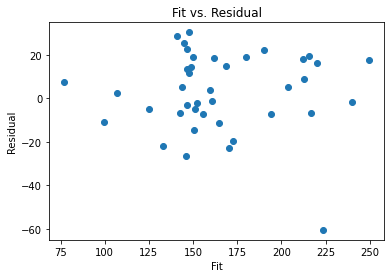

In [12]:
plt.scatter(predictions, errors)
plt.xlabel('Fit')
plt.ylabel('Residual')
plt.title('Fit vs. Residual')
plt.show()

In [13]:
from scipy.stats import bartlett, levene

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print('Bartlett test statistic: {0:3g} P-value: {1:.3g}'.format(bart_stats[0], bart_stats[1]))
print('Levene test statistic: {0:3g} P-value: {1:.3g}'.format(lev_stats[0], lev_stats[1]))

Bartlett test statistic: 18.9004 P-value: 1.38e-05
Levene test statistic: 8.93082 P-value: 0.00375


*By the Bartlett test, it is heteroscedastic by 18.9 and 8.93 on the Levene test.*

Compute the VIF for all features in the model. You will need to add a constant to your data (make a new copy just for this) to compute this with statsmodels.

How collinear are your features?

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X_con = add_constant(X)
pd.Series([variance_inflation_factor(X.values, i)
          for i in range(X.shape[1])],
          index=X.columns)

ma      16.522289
dsa     36.447367
asa     21.531330
orac     5.219167
rp      35.593090
mca      3.960262
dtype: float64

*Only ORAC and MCA are well below the common cutoff.*

Show a histogram of your error, and then plot the qq-plot for our errors (make sure to use a standardized line to compare them appropriately to the standard distribution.)

Remember to use training data.

In [17]:
predictions_train = line.predict(X_train)
errors_train = y_train - predictions_train

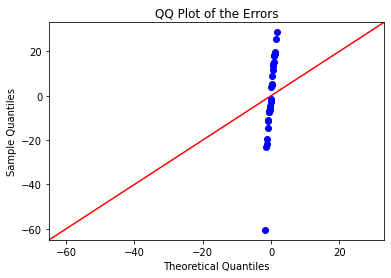

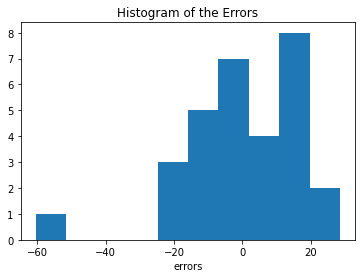

In [26]:
import statsmodels.api as sm
import pylab

sm.qqplot(errors_train, line='45')
plt.title('QQ Plot of the Errors')
plt.show()

plt.hist(errors_train)
plt.xlabel('errors')
plt.title('Histogram of the Errors')
plt.show()

Plot the actual test data against test predictions to see how well your model predicts new data.

In [33]:
from sklearn.model_selection import cross_val_predict

predictions_test = cross_val_predict(line, X, y, cv=10)

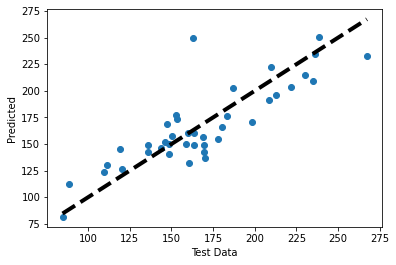

In [35]:
fig, ax = plt.subplots()
ax.scatter(y, predictions_test)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Test Data')
ax.set_ylabel('Predicted')
plt.show()